In [1]:
import pandas as pd

In [2]:
gitUrl = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/feature_regression_example.csv"

In [3]:
featuresData = pd.read_csv(gitUrl)

### 1. 데이터 불러오기 및 특성 숫자 변환

In [4]:
import pandas as pd
dataUrl = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/feature_regression_example.csv"
featuresData = pd.read_csv(dataUrl)
featuresData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442


In [5]:
### 수집한 데이터를 숫자형으로 변환한다


In [6]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [7]:
ynLabelEncoder = LabelEncoder()

In [8]:
featuresData["LE_HOLY"] = ynLabelEncoder.fit_transform(featuresData.HOLIDAY)
featuresData["LE_PROMO"] = ynLabelEncoder.fit_transform(featuresData.PROMOTION)

In [9]:
hclusScaler = MinMaxScaler()
promoScaler = MinMaxScaler()

In [10]:
featuresData["SCALED_HCLUS"] = hclusScaler.fit_transform( featuresData.loc[:, ["HCLUS"] ] )
featuresData["SCALED_PROPERCENT"] = promoScaler.fit_transform( featuresData.loc[:, ["PRO_PERCENT"] ] )

### 2. 특성선정 및 데이터 분리

In [11]:
features = [ "LE_HOLY", "LE_PROMO","SCALED_HCLUS","SCALED_PROPERCENT"]
label = ["QTY"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
trainData,testData = train_test_split( featuresData, test_size= 0.2, random_state=10 )

In [14]:
trainingDataFeatures = trainData.loc[ :, features]
trainingDataLabel = trainData.loc[ :, label]
testDataFeatures = testData.loc[ :, features]
testDataLabel = testData.loc[ :, label]

In [15]:
print( trainingDataFeatures.shape )
print( trainingDataLabel.shape )
print( testDataFeatures.shape )
print( testDataLabel.shape )

(84, 4)
(84, 1)
(21, 4)
(21, 1)


### 3. 모델 정의

In [16]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
trainingDataFeatures.loc[96].shape

(4,)

In [18]:
inputShape = trainingDataFeatures.loc[96].shape

In [19]:
model = Sequential()
# input Layer feature
model.add( Dense(units=32, activation="relu", input_shape = inputShape) )
# hidden Layer
model.add( Dense(units=32, activation="relu"))
model.add( Dense(units=32, activation="relu"))
model.add( Dense(units=32, activation="relu"))
# output Layer
model.add( Dense(units=1, activation="relu"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3361 (13.13 KB)
Trainable params: 3361 (13.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
from tensorflow.keras.utils import plot_model

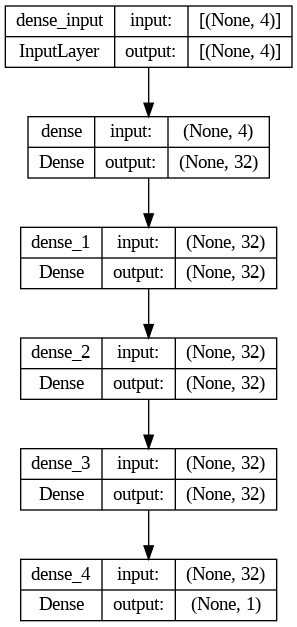

In [21]:
plot_model(model, show_shapes=True)

### 4. 모델 컴파일

In [22]:
# loss (손실함수 정의),  optimizer = (가이드방향 설정)
# metrics = 추가로 훈련중 확인하고 싶은 에러지표
model.compile( loss="mean_squared_error",
               optimizer = "adam",
               metrics = ["mean_squared_error","mean_absolute_error"] )

### 5. 모델 훈련

In [23]:
model.fit(x=trainingDataFeatures,
          y=trainingDataLabel,
          batch_size= 32,
          epochs = 1000,
          validation_split = 0.2)

Epoch 1/1000
3/3 [==============================] - 1s 137ms/step - loss: 1815280.0000 - mean_squared_error: 1815280.0000 - mean_absolute_error: 1130.2805 - val_loss: 2198686.7500 - val_mean_squared_error: 2198686.7500 - val_mean_absolute_error: 1259.2804
Epoch 2/1000
3/3 [==============================] - 0s 29ms/step - loss: 1815266.3750 - mean_squared_error: 1815266.5000 - mean_absolute_error: 1130.2700 - val_loss: 2198623.7500 - val_mean_squared_error: 2198623.7500 - val_mean_absolute_error: 1259.2502
Epoch 3/1000
3/3 [==============================] - 0s 19ms/step - loss: 1815185.7500 - mean_squared_error: 1815185.7500 - mean_absolute_error: 1130.2330 - val_loss: 2198474.7500 - val_mean_squared_error: 2198474.7500 - val_mean_absolute_error: 1259.1957
Epoch 4/1000
3/3 [==============================] - 0s 28ms/step - loss: 1815041.7500 - mean_squared_error: 1815041.7500 - mean_absolute_error: 1130.1730 - val_loss: 2198296.0000 - val_mean_squared_error: 2198296.0000 - val_mean_absol

###  6. 예측

In [24]:
preprocessFunc = [ ynLabelEncoder, ynLabelEncoder, hclusScaler,promoScaler ]
preFunc = [ features, preprocessFunc ]
import pickle
with open("prefunc.dump","wb") as fw:
    pickle.dump( preFunc, fw )

In [25]:
model.save("selloutcore.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
